 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610) </b> </h1> </center>

<b> Programming Assignment - 06 - Isolated digit recognition using Hidden Markov Model (HMM) </b>

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Assignment on Hidden Markov Models </b> <br>
We expect you to learn to build HMMs in this programming assignment. The skeleton code is provided for you to understand the algorithm. In the later part of the assignment, you need to build an N state HMM to perform isolated digit recognition task\. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.




**Part 1): Understanding the parameters of the Hidden Markov Model (HMM)**

In this part of the assignment, you will understand the functionality of the different parameters of the Hidden Markov Model (HMM). Specifically, we will sample the observations from the HMM model with different parameters to understand their influence. Let us consider the 4-state HMM with 2D observations and assume that the states of the HMM follow the Gaussian distribution. 
 
1. **Understanding the functionality of transition matrix** : 

  i. Change the transition matrix of the HMM i.e skipping some transitions, having different strengths for particular state transitions, etc 

  ii. Sample the sequence of observations with the original and altered transition matrix and plot them

  iii. Write your obervations for each case in the report. 

2. **Understanding the functionality of emission probability** : 

  i. Change the mean of the Gaussian in each state of the HMM i.e means as conrners of sqaures  etc.

  ii. Change covariance matrix of the Gaussian in each state of the HMM i.e Isotropic, diagonal, full etc. 

  ii. Sample the sequence of observations with the original and altered Gausian distribution and plot them
  
  iii. Write your obervations for each case in the report.

In [6]:
#All imports
!pip install hmmlearn
from hmmlearn import hmm
import numpy as np
import librosa
import matplotlib.pyplot as plt

from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

import scipy.io.wavfile
import io
import os

!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy

(500, 2) (500,)


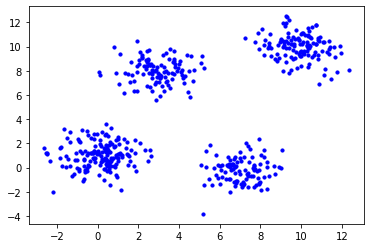

In [2]:
#You can use the built in hmm functions to generate the samples
#Set different types of transition matrix as initialization and generate the observations
#Let us use the four state hmm

#Set the prior probabilities. Note: It should follow the axioms of probability.
startprob = np.array([0.3, 0.45, 0.1, 0.15])

#Initialize the mean of the Gaussian in each state ( four states with single gaussian ) 
means = np.array([ [0.0, 1.0 ] , [3.0, 8.0] , [10.0, 10.0] , [7.0, 0.0] ])

#Initialize the covariance of the Gaussians in each state 
covars = np.tile(np.identity(2), (4, 1, 1))

#Initialize the transition matrix of the HMM 
transmat = np.array([[0.5, 0.15, 0.1, 0.25], [0.2, 0.35, 0.2, 0.25], [0.3, 0.25, 0.4, 0.05], [0.25, 0.15, 0.35, 0.25]]) 

#Build an HMM instance 
model = hmm.GaussianHMM(n_components=4, covariance_type="full") #hmm.HMMGMM() for replacing the single Gaussian with the Mixture of Gaussians

# Set the above parameters in hmm model ( ) 
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars


# Sample observation sequence of 500 length from the HMM model
X, Z = model.sample(500)


# Plot the observation sequence
print(X.shape, Z.shape)

plt.scatter(X[:,0], X[:,1], c ="blue", s=10)
plt.show()

## Solving part 1.1

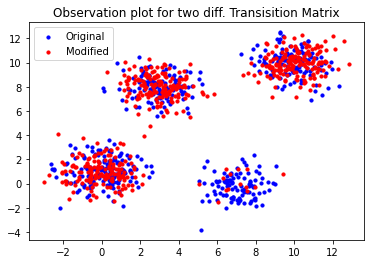

In [3]:
#Changing the transition matrix of the HMM 
transmat_new = np.array([[0.6, 0.35, 0.0, 0.05], [0.0, 0.45, 0.5, 0.05], [0.35, 0.25, 0.4, 0.0], [0.35, 0.0, 0.6, 0.05]])

model.transmat_ = transmat_new
# Sample observation sequence of 500 length from the HMM model
X_new, Z = model.sample(500)

plt.scatter(X[:,0], X[:,1], c ="blue", s = 10, )
plt.scatter(X_new[:,0], X_new[:,1], c ="red", s = 10)
plt.legend(["Original", "Modified"])
plt.title("Observation plot for two diff. Transisition Matrix")
plt.show()

## Report
Original HMM Transistion Matrix : <br>
[[0.5, 0.15, 0.1, 0.25], <br>
[0.2, 0.35, 0.2, 0.25], <br>
[0.3, 0.25, 0.4, 0.05], <br>
[0.25, 0.15, 0.35, 0.25] <br>

Modified HMM Transistion Matrix : <br>
[[0.6, 0.35, 0.0, 0.05], <br>
[0.0, 0.45, 0.5, 0.05], <br>
[0.35, 0.25, 0.4, 0.0], <br>
[0.35, 0.0, 0.6, 0.05]]<br>

<b>Upon plotting we can observe that very less observation samples are generated from 4th State (i.e mean = [7, 0]). This also evident from the modified matrix as probabilities of going into state 4 is very less for each state of HMM.</b>

## Solving part 1.2

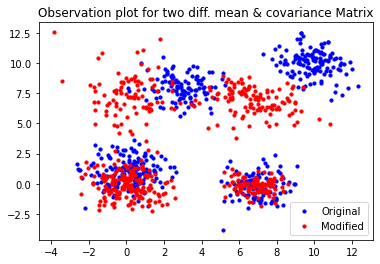

In [4]:
#Means to be on squares
means = np.array([ [0.0, 0.0 ] , [0.0, 7.0] , [7.0, 7.0] , [7.0, 0.0] ])

transmat = np.array([[0.5, 0.15, 0.1, 0.25], [0.2, 0.35, 0.2, 0.25], [0.3, 0.25, 0.4, 0.05], [0.25, 0.15, 0.35, 0.25]]) 

#changing covariances
covars = np.array([ [[1, 0], [0, 1]], [[2, 0], [0, 3]], [[3, 0], [0, 1]], [[0.6, 0], [0, 0.4]] ])

model.transmat_ = transmat
model.means_ = means
model.covars_ = covars

# Sample observation sequence of 500 length from the HMM model
X_new2, Z = model.sample(500)

plt.scatter(X[:,0], X[:,1], c ="blue", s = 10, )
plt.scatter(X_new2[:,0], X_new2[:,1], c ="red", s = 10)
plt.legend(["Original", "Modified"])
plt.title("Observation plot for two diff. mean & covariance Matrix")
plt.show()

## Observation and Report

We can observe that, isotropic covariance based observational state gives uniform spread in all directions. Where as other states are more aliging their observations along a direction.

**Part 2): Isolated Digit Recognition**

In this part of assignment you have to implement the isolated digit recognition system using HMM.
1. Record 5 to 10 repetition each of digits zero,one,two,three,four,five,six,seven,eight and nine (for testing on recorded data). (The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes.)
2. Compute MFCC features ( sequence of observations). (The codes to compute the signal's templates ( Mel Frequency Cepstral Coefficients ) are provided. Please use them to obtain the templates of the speech signals.)
3. Train a N state HMM model for each digit and store the model
3. Compute the probability of generating test observation sequence given the trained model of the digits. P(O/λw)
4. Get the predicted label from P(O/λw) where 0<=w<=9
5. Repeat the above experiment by increasing number of states (N) in word HMM ranging from 5 to 15. Report your accuracy and observations.
6. Repeat the above experiment with varying the number of states across the digits i.e you may use large number of states for large digits. Report the accuracy and observations.
7. Experiment with GMM and Single Gaussian for both single speaker ( recorded  ) and multiple speakers ( provided ) digits data base. Write the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts and report your analysis in the report section.
7. Create a confusion matrix and report the most confusing digits.
8. Compare the performance with that obtained using DTW algorithm (in previous assignment).

[link to multi speaker digit data base](https://drive.google.com/drive/folders/1faRFWAkGA8tEm_g5VbDyZCvmsn05CWT6?usp=sharing)

**Module to record the voice in online mode**

## 2.1

In [ ]:
RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [ ]:
#### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
!rm recording.wav

#### You can run this module in the loop to record more repetitions of the digits.
if os.path.isfile('recording.wav'):
    print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
    print("Recording the digits")
    wav = record(3.0) #It will record three seconds of your speech. You can change the duration. 
    wav = wav.set_frame_rate(16000)
    sig=wav.get_array_of_samples()
    samples=np.array(sig).T.astype(np.float32)
    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(sig.typecode).max
    scipy.io.wavfile.write('8_akhil_5.wav', 16000, fp_arr) #Please change the name.

**Code to compute the signal's templates i.e Mel Frequency Cepstral Coefficients**

## 2.2

In [7]:
import scipy.io.wavfile as wav

def MFCC(wavfile):
  ###########################
  # Input  : Signal of length t
  # Output : Templates of size (T,30) where T is the number of frames and 30 is dimension of the feature for each frame
  ###########################
  (rate,sig) = wav.read(wavfile)
  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,rate,numcep=30,winlen=0.025,winstep=0.01,nfilt=30,lowfreq=20,highfreq=7600,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  return mfcc_feat_cmvn

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Write a function to train Hidden Markov Model (HMM) and return the trained models**

## 2.3, 2.4

In [35]:
from pandas.core.groupby.groupby import GroupByPlot
from hmmlearn.hmm import GaussianHMM, GMMHMM

def hmm(TrainingDataset, case, N, varying):
    #Input trainng dataset
    #Output trained HMM models
    #You may use "hmm.GMMHMM" or "hmm.GaussianHMM" function and fit method to train the models 
    #Experiment with GMM and Single Gaussian for both single speaker ( recorded  ) and multiple speakers ( provided ) digits data base.

    models = {}

    for i in range(0, 10):

      if varying:
        
        # digitwise case
        if i == 0:      N = 4
        elif i == 1:    N = 3
        elif i == 2:    N = 3
        elif i == 3:    N = 5
        elif i == 4:    N = 4
        elif i == 5:    N = 4
        elif i == 6:    N = 3
        elif i == 7:    N = 5
        elif i == 8:    N = 5
        elif i == 9:    N = 4

      X = np.concatenate(TrainingDataset[i])

      lengths = [len(item) for item in TrainingDataset[i]]

      if case == "GHMM": 
        model = GaussianHMM(n_components=N)

      elif case == "GMMHMM":
        model = GMMHMM(n_components=N, n_mix=2)
      else:
        print("Invalid model type passed!")
        return 0

      model.fit(X, lengths)
      models[i] = model   

    #Return the trained model
    return models

**Write a function to perform isolated digit recognition**

In [36]:
import os

def buildDataset(datadir, trainPercentage): 
    #Takes input as the data set location and percentage of training data to be used
    dataset = {}
    data_files = []
    for root, dirs, files in os.walk(datadir):
        for file in files:
            if file.endswith(".wav"):
                data_files.append(os.path.join(root, file))
    data_files = np.array(data_files)
    
    for file in data_files:
      label = int(file.split(datadir, 1)[1][0])
      feature = MFCC(file)
      if label not in dataset.keys():
          dataset[label] = []
          dataset[label].append(feature)
      else:
          exist_feature = dataset[label]
          exist_feature.append(feature)
          dataset[label] = exist_feature        

    keys = dataset.keys()
    train_dataset = {}
    test_dataset = {}

    for k in keys:
      train_val, test_val = np.split(dataset[k], [int(len(dataset[k])*trainPercentage)])
      train_dataset[k] = train_val
      test_dataset[k] = test_val

    #Return the data set
    return [train_dataset, test_dataset]

## 2.5

In [49]:
def IsolatedDigitRecognition(trainDir, N = 5, case = "GMMHMM", varying=False):

    trainData, testData = buildDataset(trainDir, 0.8)
    print("Finished train-test split")

    #Train HMM models for all the digits ( zero, one, two, three, four, five, six, seven, eight and nine)
    models = hmm(trainData, case, N, varying)
    print("Finished training of the ", case ," models for digits 0-9")

    #Testing 

    test_data = []
    test_labels = []
    test_predictions = []

    for key in testData.keys():
      test_data.append(testData[key].reshape(-1,30))
      test_labels.append(key)

    #Iterate through the test data set

    for i in range(len(test_data)):

      #Compute the probability of generating sequece of observations ( test speech signal MFCC features ) given the trained hmm models of the digits p(O/Trained word model)
      feature = test_data[i]
      label = test_labels[i]
      scoreList = {}
      for model_label in models.keys():
        model = models[model_label]
        score = model.score(feature)
        scoreList[model_label] = score

      #Get the digit model achieving highest probability in generating the sequence
      predict = max(scoreList, key=scoreList.get)
      test_predictions.append(predict)

    return [test_predictions, test_labels]


  # We have original labels of the test data and predicted labels from the Hidden Markov Models (HMM)
  # Compute the test accuracy and report in the observations

Finished train-test split
Finished training of the  GMMHMM  models for digits 0-9
GMM-HMM Accuracy (Same Speaker, # states = 5): 100.0 %


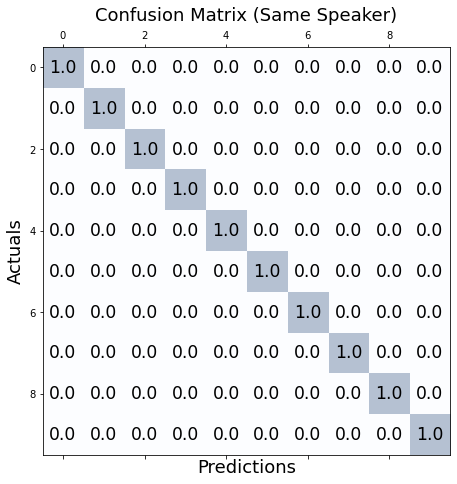

In [50]:
pred_gmm, true_gmm = IsolatedDigitRecognition('/content/drive/My Drive/my_digit_dataset/', N=5, case = "GMMHMM")

correct = np.sum(np.array(pred_gmm) == np.array(true_gmm))
accuracy_gmm = correct/len(true_gmm)
print("GMM-HMM Accuracy (Same Speaker, # states = 5):", accuracy_gmm*100, "%")

# correct = np.sum(np.array(pred_ghmm) == np.array(true_ghmm))
# accuracy_ghmm = correct/len(true)
# print("Gaussian  Accuracy (Same Speaker):", accuracy_ghmm*100, "%")

# Confusion matrix

K = len(np.unique(true_gmm)) # Number of classes 
conf_matrix= np.zeros((K, K))

for i in range(len(true_gmm)):
  conf_matrix[true_gmm[i]][pred_gmm[i]] += 1

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (Same Speaker)', fontsize=18)
plt.show()

## 2.6

### Observations
From the plot we can say that, there is no much affect of increase in number of HMM states and accuracy remains to be same (100% with one file for each digit in test dataset)

For N =  5
Finished train-test split
Finished training of the  GMMHMM  models for digits 0-9
For N =  6
Finished train-test split
Finished training of the  GMMHMM  models for digits 0-9
For N =  7
Finished train-test split
Finished training of the  GMMHMM  models for digits 0-9
For N =  8
Finished train-test split
Finished training of the  GMMHMM  models for digits 0-9
For N =  9
Finished train-test split
Finished training of the  GMMHMM  models for digits 0-9
For N =  10
Finished train-test split
Finished training of the  GMMHMM  models for digits 0-9


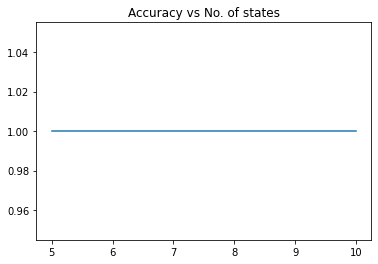

In [39]:
accuracies = {}

for n in range(5, 11, 1):
  print("For N = ", n)
  pred_gmm, true_gmm = IsolatedDigitRecognition('/content/drive/My Drive/my_digit_dataset/', N=n, case = "GMMHMM")
  correct = np.sum(np.array(pred_gmm) == np.array(true_gmm))
  accuracy_gmm = correct/len(true_gmm)
  accuracies[n] = accuracy_gmm

plt.plot(list(accuracies.keys()), list(accuracies.values()))
plt.title("Accuracy vs No. of states")
plt.show()

## 2.7

### Observations and Report

With varying number of states for each model can give more accurate and efficient way of predicting the states. Longer spoken duration words with more breaks while speaking (eg. seven, three) can be given more number of states compared to shorter spoken duration words (eg. one, two, six). From the below plot we can observe the accuracy to be 100% (for test folder containing 20% of dataset)

Finished train-test split
Finished training of the  GMMHMM  models for digits 0-9
GMM-HMM Accuracy (Same Speaker, varying # of states for each digit): 100.0 %


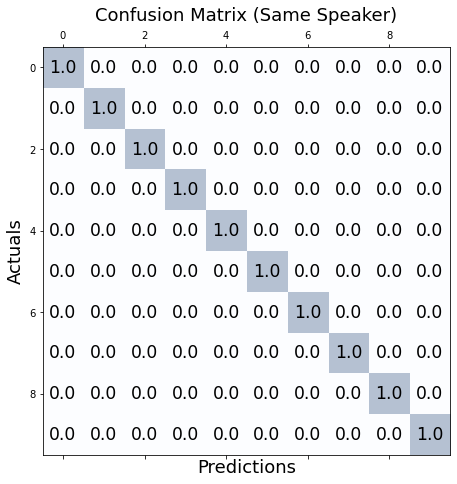

In [40]:
# modified gmmhmm with varying number of states

pred_gmm, true_gmm = IsolatedDigitRecognition('/content/drive/My Drive/my_digit_dataset/', case = "GMMHMM", varying = True)

correct = np.sum(np.array(pred_gmm) == np.array(true_gmm))
accuracy_gmm = correct/len(true_gmm)
print("GMM-HMM Accuracy (Same Speaker, varying # of states for each digit):", accuracy_gmm*100, "%")

# Confusion matrix

K = len(np.unique(true_gmm)) # Number of classes 
conf_matrix= np.zeros((K, K))

for i in range(len(true_gmm)):
  conf_matrix[true_gmm[i]][pred_gmm[i]] += 1

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (Same Speaker)', fontsize=18)
plt.show()

## 2.8, 2.9

Finished train-test split
Finished training of the  GHMM  models for digits 0-9
Gaussian-HMM Accuracy (Same Speaker): 100.0 %


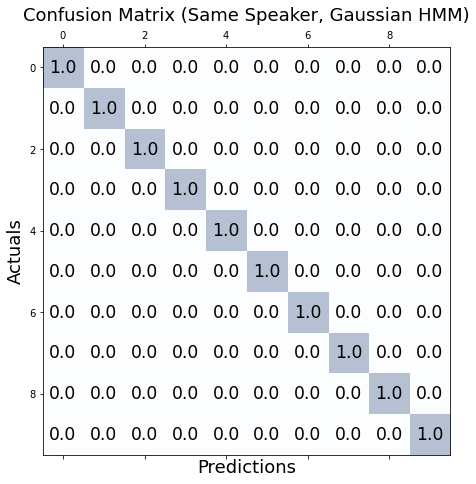

Finished train-test split
Finished training of the  GMMHMM  models for digits 0-9
GMM-HMM Accuracy (Same Speaker): 100.0 %


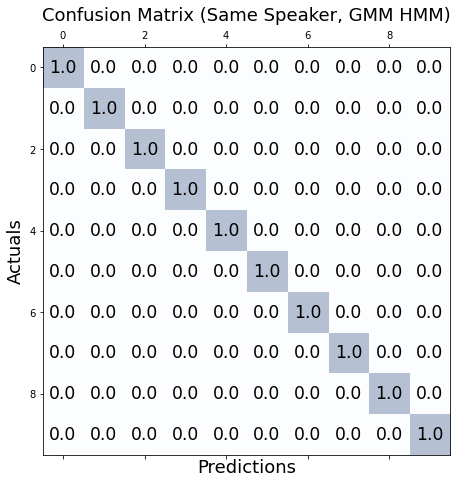

In [51]:
# creating gaussian HMM & GMMHMM models and getting predictions for both single and multi speaker case

# single speaker case

# Gaussian HMM case

pred, true = IsolatedDigitRecognition('/content/drive/My Drive/my_digit_dataset/', N =5, case = "GHMM")

correct = np.sum(np.array(pred) == np.array(true))
accuracy = correct/len(true)
print("Gaussian-HMM Accuracy (Same Speaker):", accuracy*100, "%")

# Confusion matrix

K = len(np.unique(true)) # Number of classes 
conf_matrix= np.zeros((K, K))

for i in range(len(true)):
  conf_matrix[true[i]][pred[i]] += 1

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (Same Speaker, Gaussian HMM)', fontsize=18)
plt.show()


# GMM HMM Case

pred, true = IsolatedDigitRecognition('/content/drive/My Drive/my_digit_dataset/', N =5, case = "GMMHMM")

correct = np.sum(np.array(pred) == np.array(true))
accuracy = correct/len(true)
print("GMM-HMM Accuracy (Same Speaker):", accuracy*100, "%")

# Confusion matrix

K = len(np.unique(true)) # Number of classes 
conf_matrix= np.zeros((K, K))

for i in range(len(true)):
  conf_matrix[true[i]][pred[i]] += 1

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (Same Speaker, GMM HMM)', fontsize=18)
plt.show()

# multispeaker case

def MFCC(wavfile):
  ###########################
  # Input  : Signal of length t
  # Output : Templates of size (T,30) where T is the number of frames and 30 is dimension of the feature for each frame
  ###########################
  (rate,sig) = wav.read(wavfile)
  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,rate,numcep=30,winlen=0.025,winstep=0.01,nfilt=30,lowfreq=20,highfreq=4000,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  return mfcc_feat_cmvn

# Gaussian HMM case

pred, true = IsolatedDigitRecognition('/content/drive/My Drive/MultiSpeakerDigitData/', N =5, case = "GHMM")

correct = np.sum(np.array(pred) == np.array(true))
accuracy = correct/len(true)
print("Gaussian-HMM Accuracy (Multi Speaker):", accuracy*100, "%")

# Confusion matrix

K = len(np.unique(true)) # Number of classes 
conf_matrix= np.zeros((K, K))

for i in range(len(true)):
  conf_matrix[true[i]][pred[i]] += 1

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (Multi Speaker, Gaussian HMM)', fontsize=18)
plt.show()


# GMM HMM Case

pred, true = IsolatedDigitRecognition('/content/drive/My Drive/MultiSpeakerDigitData/', N =5, case = "GMMHMM")

correct = np.sum(np.array(pred) == np.array(true))
accuracy = correct/len(true)
print("GMM-HMM Accuracy (Multi Speaker):", accuracy*100, "%")

# Confusion matrix

K = len(np.unique(true)) # Number of classes 
conf_matrix= np.zeros((K, K))

for i in range(len(true)):
  conf_matrix[true[i]][pred[i]] += 1

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (Multi Speaker, GMM HMM)', fontsize=18)
plt.show()

**Report**

1. Compared to DTW Algorithm based isolated digit recognition, Hidden markov model (HMM) based predictions are more accurate with negligible confusions.

2. DTW is a method that provide non-linear alignment between two voice signals where as HMM statistically models the words